In [1]:
#EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('Data.csv')

In [3]:
lis = []
for i in df['Length (ft)']:
    if i == "-":
        i = float("nan");
    else:
        i = int(i)
    lis.append(i)
df['Length (ft)'] = lis

In [4]:
lis2 = []
for i in df['Rating']:
    if i.find("5.6") >= 0:
        i = "(5)6"
    elif i.find("5.7") >= 0:
        i = "(5)7"
    elif i.find("5.8") >= 0:
        i = "(5)8"
    elif i.find("5.9") >= 0:
        i = "(5)9"
    elif i.find("5.10") >= 0:
        i = "5-10"
    elif i.find("5.11") >= 0:
        i = "5-11"
    elif i.find("5.12") >= 0:
        i = "5-12"
    lis2.append(i)
df['Ratings Simplified'] = lis2

In [5]:
df.head()

,Unnamed: 0,Name,Rating,Stars,First Ascent,Type,Length (ft),Pitches,Ratings Simplified
0,0,Tachycardia,5.7,3.6,Matthew Selman,Sport,300.0,3,(5)7
1,1,49,5.12a,3.7,Bill Boyle,Sport,80.0,1,5-12
2,2,Streak,5.11b,3.6,Boone Speed,Sport,105.0,1,5-11
3,3,Zoaster Toaster,5.11d,3.5,Bill Boyle,Sport,90.0,1,5-11
4,4,The Hitchhiker,5.11c,3.5,Darren Knezek,Sport,125.0,1,5-11


In [6]:
(df["Pitches"] == 5).sum()

1

In [7]:
sns.set_theme()

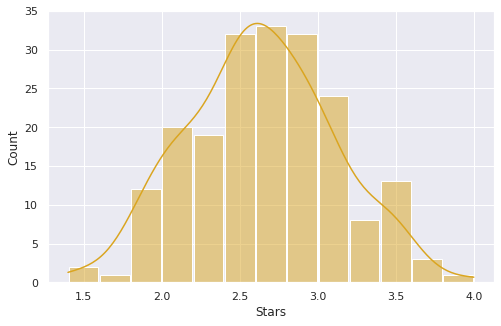

In [8]:
sns.set(rc={"figure.figsize":(8, 5)})
sns.histplot(df, x = "Stars", kde=True, shrink = .95, color = "goldenrod", bins = 13)
plt.show()

In [9]:
sorted_df = df.sort_values(by='Ratings Simplified', ascending = True)

In [10]:
sorted_df

,Unnamed: 0,Name,Rating,Stars,First Ascent,Type,Length (ft),Pitches,Ratings Simplified
107,107,That Be Me,5.6,2.1,Jason Stevens,Sport,50.0,1,(5)6
79,79,Bullets Over Baghdad,5.6,3.4,Jason Stevens,Sport,90.0,1,(5)6
177,177,Justice,5.6,2.5,Glenn Ritter,Sport,75.0,1,(5)6
142,142,Butter that Bacon,5.6,2.5,Tyler Phillips,Sport,60.0,1,(5)6
98,98,Moss Pocket,5.6,1.8,Jason Stevens,Sport,40.0,1,(5)6
...,...,...,...,...,...,...,...,...,...
157,157,Crescent Moon,5.12a,2.3,Chris Black,Sport,40.0,1,5-12
150,150,When Cobbles Fly,5.12a,2.8,Tim Roberts,Sport,100.0,1,5-12
140,140,Whiskey on the Southbound,5.12a,2.7,Dan Snyder,Sport,NaN,1,5-12
50,50,Grip Tease,5.12a,2.9,Bill Boyle,Sport,80.0,1,5-12


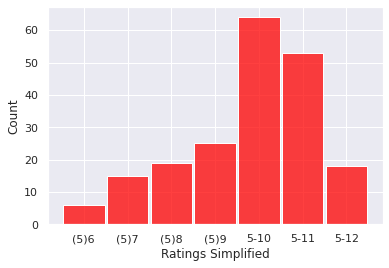

In [11]:
sns.set(rc={"figure.figsize":(6, 4)})

sns.histplot(sorted_df, x = "Ratings Simplified", shrink = .95, color = "red")
plt.show() 

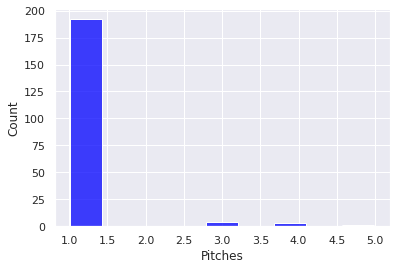

In [12]:
sns.histplot(df, x = "Pitches", shrink = .95, color = "Blue")
plt.show()

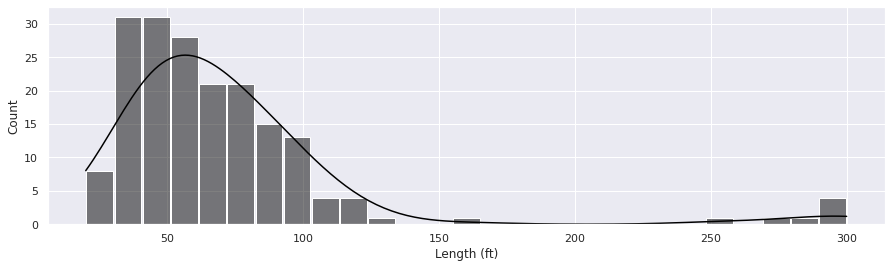

In [13]:
sns.set(rc={"figure.figsize":(15, 4)})
sns.histplot(df, x = "Length (ft)", kde=True, shrink = .95, color = "black")
plt.show()

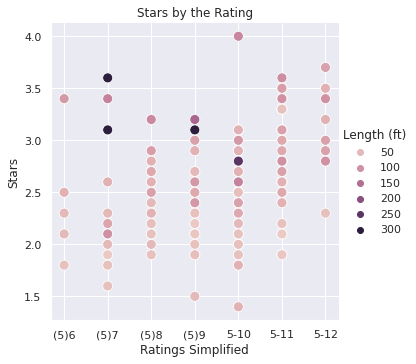

In [14]:
#sns.set_palette("Dark2")
sns.relplot(data=sorted_df, x = "Ratings Simplified", y="Stars", hue = "Length (ft)", s = 100).set(title = "Stars by the Rating")

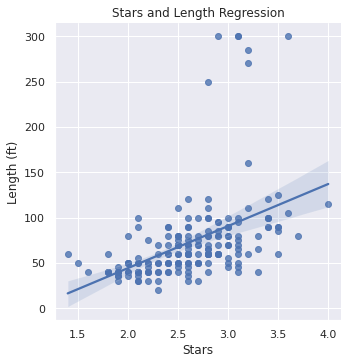

In [15]:
sns.lmplot(x = "Stars", y = "Length (ft)", data=sorted_df).set(title = "Stars and Length Regression")

In [16]:
#Corr plot. .45 between Stars and Length (ft)
#df3 = df[["Stars", "Length (ft)"]]
#corr = df3.corr(numeric_only = True)
#a = sns.heatmap(corr, annot = True).set(title = "Correlation Matrix")

In [17]:
back_sorted_df = df.sort_values(by='Ratings Simplified', ascending = False)

<Figure size 1440x1440 with 0 Axes>

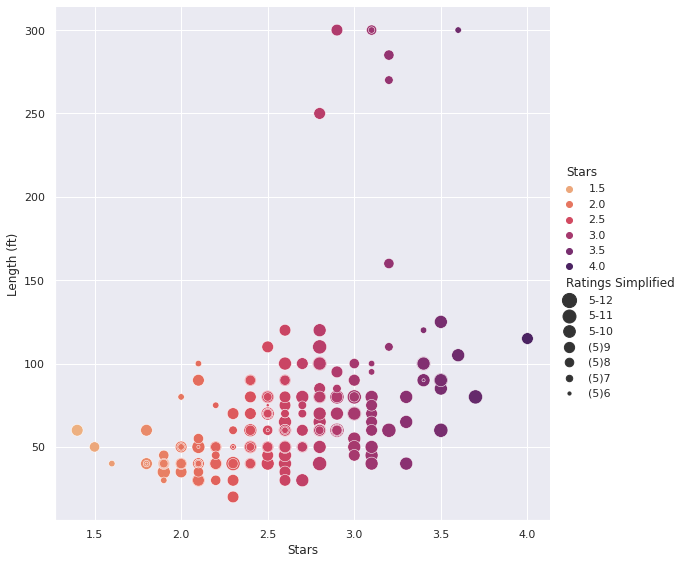

In [30]:
sns.set(rc={"figure.figsize":(15, 15)})
sns.set_theme(style="darkgrid")

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20, 20)


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

fig = sns.relplot(data = back_sorted_df,
            x = "Stars", 
            y = "Length (ft)", 
            hue = "Stars", 
            size = "Ratings Simplified", 
            sizes=(10, 200), 
            palette='flare', height = 8)
fig.savefig('Plot.png') 